# Clase 4: Introducción al Deep Learning con Keras y TensorFlow
---

<img src="../img/sergio_portrait_square.png" alt="Sergio Benito" align="right" width="100">

- **Autor:** Sergio Benito Martín
- **Contacto:** pontia@sergiobenito.com
- **Última actualización:** 27/06/2025

### Objetivo
Entender qué es Deep Learning y poner en práctica cómo llevarlo a cabo en casos de uso de: regresión, clasificación binaria y multiclase.

También, dada la naturaleza de este paradigma, empezaremos a trabajar con datos no estructurados como son las imágenes.

<center><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*BIpRgx5FsEMhr1k2EqBKFg.gif" alt="Ejemplo Deep Learning" width=700/></center>
<center><a src="https://medium.com/@p._./neural-nets-299072b6e45f">Fuente: Medium - Neural-Nets</a></center>

|                 TensorFlow                  |                   Keras                     |
| -----------------------------------------   | -----------------------------------------   |
|   ⚙️ Motor de cálculo profundo               | 😊 Interfaz fácil y amigable               |
|   🧠 Control total, bajo nivel               | 🧩 Construcción rápida de modelos          |
|   🚀 Computación eficiente (GPU, CPU, TPU)   | ✨ Enfoque alto nivel                      |
|   🏗️ Permite construir modelos complejos     | 🎯 Ideal para principiantes                |
|   📦 Incluye Keras como interfaz             | ➡️ Usa TensorFlow “por debajo”             |

### Temas a tratar

1. Regresión con Keras
2. Clasificación binaria con Keras
3. Clasificación múltiple con Keras
4. Regularización
5. Ejercicios para practicar

### Información útil
+ [Machine Learning Mastery - How to Choose an Activation Function for Deep Learning](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/)
+ Medium:
  + [20 Must-Know Topics in Deep Learning for Beginners](https://medium.com/@aspershupadhyay/mastering-deep-learning-20-key-concepts-explained-ea405aa6603d)
  + [A Comprehensive Guide on Loss Functions in Machine Learning](https://medium.com/data-science-collective/a-comprehensive-guide-of-loss-functions-b9d5ba54ae7f)
  + [A handy guide for Deep Learning Beginners](https://medium.datadriveninvestor.com/a-short-handy-guide-for-deep-learning-beginners-febde48b8539)
  + [CNN with TensorFlow for Deep Learning Beginners](https://nikkisharma536.medium.com/cnn-with-tensorflow-for-deep-learning-beginners-3def5e98945)
  + [Difference between ANN and CNN](https://medium.com/@abhishekjainindore24/difference-between-ann-and-cnn-ada6303171df)
  + [Secret Sauce behind the beauty of Deep Learning: Beginners guide to Activation Functions](https://medium.com/data-science/secret-sauce-behind-the-beauty-of-deep-learning-beginners-guide-to-activation-functions-a8e23a57d046)
  + [TensorFlow Template for Deep Learning Beginners](https://medium.com/data-science/tensorflow-template-for-deep-learning-beginners-3b976d0ee084)
+ Documentación oficial:
  + [TensorFlow - Keras](https://www.tensorflow.org/guide/keras/functional?hl=es-419)
---


### Para profundizar más 🤓

Comparación de hiperparámetros según si el caso de uso es regresión, clasificación binaria o multiclase:

| Tipo de problema      | Función de activación en capas ocultas | Función de activación última capa | Nº de neuronas en la última capa      | Función de coste (loss)               |
|----------------------|----------------------------------------|------------------------------------|----------------------------------------|----------------------------------------|
| **Regresión**        | ReLU (o similar, por ejemplo, tanh)    | Lineal (ninguna o `linear`)        | 1 (o más si multi-output)              | Mean Squared Error (`mse`), MAE        |
| **Clasificación binaria** | ReLU (o similar)                   | Sigmoid                            | 1                                      | Binary Crossentropy (`binary_crossentropy`) |
| **Clasificación multiclase** | ReLU (o similar)                | Softmax                            | Número de clases                       | Categorical Crossentropy (`categorical_crossentropy`) ó Sparse Categorical Crossentropy (`sparse_categorical_crossentropy`)|

En el caso de una clasificación multiclase puede haber de dos tipos:

| Tipo de problema    | Activación salida | Nº neuronas salida | Función de coste           | Formato etiqueta (y)    |
|---------------------|-------------------|--------------------|----------------------------|-------------------------|
| Multiclase excluyente | Softmax           | Nº de clases       | Categorical Crossentropy   | Clase (única), ej: 2    |
| Multiclase incluyente | Sigmoid           | Nº de etiquetas    | Binary Crossentropy        | Vector, ej: [1,0,1,0]   |



## 0. Configuración del Notebook
Importaremos todas las librerías y funciones que vemos relevantes para el notebook que vamos a crear. Lo ideal sería tener todas las importaciones juntas, de tal manera que se puedan controlar de manera sencilla.

### Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import tensorflow as tf

from plotly.subplots import make_subplots
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_diabetes, load_iris, load_wine
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [2]:
# Importamos esta librería para solventar el problema que podáis tener para visualizar gráficos con Plotly
from IPython.display import HTML

### Definición de constantes

In [ ]:
# Paths
PATH_DIRECTORIO_DATOS = "./data"

PATH_DATASET_ADVERTISING = f"{PATH_DIRECTORIO_DATOS}/advertising.csv"
PATH_DATASET_CALORIES = f"{PATH_DIRECTORIO_DATOS}/calories.csv"
PATH_DATASET_CALORIES_LITE = f"{PATH_DIRECTORIO_DATOS}/calories_time_reduc.csv"
PATH_DATASET_CALORIES_TIME = f"{PATH_DIRECTORIO_DATOS}/calories_time.csv"
PATH_DATASET_HEART = f"{PATH_DIRECTORIO_DATOS}/heart_disease.csv"
PATH_DATASET_BOSTON = f"{PATH_DIRECTORIO_DATOS}/housing_boston.csv"
PATH_DATASET_TWEETS = f"{PATH_DIRECTORIO_DATOS}/nlp_tweets.csv"

# Datasets de Internet
URL_DATASET_PENGUINS = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"

In [ ]:
IF_PLOTLY_FAILS = False

### Definición de funciones

In [ ]:
# Calculamos las métricas de evaluación
def calcular_metricas_evaluacion_regresion(y_prediccion: np.ndarray, y_real: np.ndarray, verbose: bool = True):
    """Calcula las métricas de evaluación para un modelo de regresión.

    Calcula cuatro métricas comunes para evaluar modelos de regresión: MSE (Error Cuadrático Medio),
    RMSE (Raíz del Error Cuadrático Medio), MAE (Error Absoluto Medio) y R² (Coeficiente de determinación).
    Opcionalmente imprime los resultados en un formato legible.

    Args:
        y_prediccion (np.ndarray): Valores predichos por el modelo.
        y_real (np.ndarray): Valores reales observados.
        verbose (bool, optional): Si es True, imprime las métricas calculadas. Por defecto es True.

    Returns:
        tuple[float, float, float, float]: Una tupla con cuatro valores en el siguiente orden:
            - mse: Error cuadrático medio.
            - rmse: Raíz del error cuadrático medio.
            - mae: Error absoluto medio.
            - r2: Coeficiente de determinación.

    Example:
        >>> mse, rmse, mae, r2 = calcular_metricas_evaluacion(modelo.predict(X_test), y_test)
        >>> print(f"R²: {r2:.4f}")
    """

    mse = mean_squared_error(y_real, y_prediccion)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_prediccion)
    r2 = r2_score(y_real, y_prediccion)

    if verbose:
        print("\nEvaluación del modelo:")
        print(f"MSE (Error cuadrático medio): {mse:.4f}")
        print(f"RMSE (Raíz del error cuadrático medio): {rmse:.4f}")
        print(f"MAE (Error absoluto medio): {mae:.4f}")
        print(f"R² (Coeficiente de determinación): {r2:.4f}")
        print(f"El modelo explica aproximadamente el {r2:.2%} de la varianza")

    return mse, rmse, mae, r2

### Carga de datos

#### Boston Prices

| Variable | Descripción | Tipo |
|----------|-------------|------|
| CRIM     | Tasa de criminalidad per cápita por ciudad | Numérico continuo |
| ZN       | Proporción de terrenos residenciales para lotes mayores de 25,000 pies cuadrados | Numérico continuo |
| INDUS    | Proporción de acres de negocios no minoristas por ciudad | Numérico continuo |
| CHAS     | Variable ficticia que indica si el tramo está junto al río Charles (1 = sí, 0 = no) | Binario (0/1) |
| NOX      | Concentración de óxidos nítricos (partes por 10 millones) | Numérico continuo |
| RM       | Número promedio de habitaciones por vivienda | Numérico continuo |
| AGE      | Proporción de unidades construidas antes de 1940 | Numérico continuo |
| DIS      | Distancia ponderada a cinco centros de empleo de Boston | Numérico continuo |
| RAD      | Índice de accesibilidad a autopistas radiales | Entero categórico |
| TAX      | Tasa de impuesto a la propiedad de valor total por $10,000 | Entero |
| PTRATIO  | Proporción alumno/profesor por ciudad | Numérico continuo |
| B        | 1000(Bk - 0.63)^2, donde Bk es la proporción de personas negras por ciudad | Numérico continuo |
| LSTAT    | Porcentaje de estatus bajo de la población | Numérico continuo |
| MEDV     | Valor medio de viviendas ocupadas por sus propietarios (en miles de dólares) | Numérico continuo (variable objetivo) |

In [37]:
# Carga de datos
df_boston = pd.read_csv('/content/housing_boston.csv')

In [ ]:
# Visualización de los primeros registros
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# Información del DataFrame
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [38]:
# Preprocesamiento de datos
# Duplicamos el DataFrame para no modificar el original
df_boston_preprocessed = df_boston.copy()

# Convertimos los nombres de las columnas a minúsculas
df_boston_preprocessed.columns = df_boston_preprocessed.columns.str.lower()

#### Heart Diseases

| Variable | Descripción | Tipo |
| -------- | ----------- | ---- |
| age | Edad del paciente | Numérico |
| sex | Sexo (1 = hombre, 0 = mujer) | Binario |
| cp | Tipo de dolor en el pecho (0-3) | Categórico |
| trestbps | Presión arterial en reposo | Numérico |
| chol | Colesterol sérico (mg/dl) | Numérico |
| fbs | Glucemia en ayunas (>120 mg/dl) (1 = sí) | Binario |
| restecg | Resultados electrocardiográficos en reposo | Categórico |
| thalach | Frecuencia cardíaca máxima alcanzada | Numérico |
| exang | Angina inducida por ejercicio (1 = sí) | Binario |
| oldpeak | Depresión del ST inducida por ejercicio | Numérico |
| slope | Pendiente del segmento ST en esfuerzo | Categórico |
| ca | Número de vasos principales (0-3) | Numérico |
| thal | Resultado de la prueba de talio (1,2,3) | Categórico |
| target | Enfermedad cardíaca (1 = Sí, 0 = No) | Binario |

In [ ]:
# Carga de datos del dataset
df_heart = pd.read_csv('/content/heart_disease.csv')

In [ ]:
# Mostramos las primeras filas del DataFrame
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Información del DataFrame
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 1. Regresión con Keras
Vamos a implementar un modelo de regresión pero basado en Deep Learning usando Keras. Para ello, los pasos iniciales como la recogida de datos y el preprocesamiento serán similares, ya que el cambio estará en toda la fase de modelado.

### Preprocesamiento de datos
Algunas de las técnicas de preprocesamiento típicas de las redes neuronales son:

| Técnica                        | Descripción breve                                                        | ¿Cuándo usarla?                       | ¿Por qué es importante?                                     | Ejemplo o herramienta común         |
|---------------------------------|--------------------------------------------------------------------------|----------------------------------------|------------------------------------------------------------|-------------------------------------|
| **Normalización**               | Escalar datos entre 0 y 1 (o -1 y 1)                                     | Imágenes, datos numéricos              | Evita que variables con valores grandes dominen el aprendizaje | `MinMaxScaler` (sklearn), /255 en imágenes |
| **Estandarización**             | Restar media y dividir por desviación típica (media 0, varianza 1)       | Datos numéricos / tabulares              | Acelera y estabiliza el entrenamiento de la red neuronal    | `StandardScaler` (sklearn)          |
| **Tratar valores nulos**      | Imputar o eliminar datos faltantes                                       | Datos tabulares con valores perdidos   | Las redes no pueden manejar datos faltantes directamente    | `.fillna()`, `SimpleImputer` (sklearn) |
| **Codificación categórica**     | Convertir texto/categorías en números                                    | Variables categóricas                  | Las redes solo pueden trabajar con datos numéricos          | `pd.get_dummies()` (Pandas), `OneHotEncoder`, `LabelEncoder`, `OrdinalEncoder` (sklearn)     |
| **Barajar (shuffling)**         | Mezclar el orden de las muestras                                         | Antes de dividir en train/test         | Evita que la red aprenda patrones artificiales por el orden | `shuffle` (sklearn), `shuffle=True` en fit |
| **División de datos**           | Separar en train, validación y test                                      | Siempre, antes de entrenar             | Permite evaluar si el modelo generaliza a datos nuevos      | `train_test_split` (sklearn)        |
| **Balanceo de clases**          | Corregir desbalance entre clases                                         | Clasificación desbalanceada            | Evita que la red “ignore” clases minoritarias               | `SMOTE`, oversampling, undersampling |

Se puede utilizar el método de Scikit-Learn `Pipeline` para hacer una consecución de técnicas de preprocesamiento encadenadas si fuera necesario y así sea un proceso más rápido y eficiente, para ello será necesario importar la clase:
```python
from sklearn.pipeline import Pipeline
```

In [39]:
from sklearn.pipeline import Pipeline

# Hacemos un train-test split del dataframe
X_boston = df_boston_preprocessed.drop(columns=["medv"])
y_boston = df_boston_preprocessed["medv"]

X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

In [40]:
# Usamos Pipeline para el preprocesamiento de datos de boston
# Primero definimos las columnas numéricas y categóricas
list_numeric_cols = df_boston_preprocessed.select_dtypes(include='number').columns.tolist()

# Definimos el preprocesamiento para las columnas numéricas
pipe_transformer = Pipeline(steps=[
    ('inputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
pipe_transformer

Pipeline(steps=[('inputer', SimpleImputer()), ('scaler', StandardScaler())])

In [41]:
# Aplicamos el preprocesamiento a los conjuntos de entrenamiento y prueba
# Esto transformará las columnas numéricas, imputando valores faltantes y escalando los datos
X_train_boston_scaled = pipe_transformer.fit_transform(X_train_boston)
X_test_boston_scaled = pipe_transformer.transform(X_test_boston)

### Construcción de la red neuronal
La construcción de una red neuronal con Keras sigue un proceso estructurado que podemos dividir en pasos claros:

1. **Definir la arquitectura del modelo**:
   + Especificar el tipo de modelo (Sequential o Functional API)
   + Definir las capas (input, hidden, output)
   + Establecer el número de neuronas por capa
   + Seleccionar las funciones de activación adecuadas

2. **Compilar el modelo**:
   + Elegir el optimizador (Adam, SGD, RMSprop)
   + Definir la función de pérdida (loss function)
   + Seleccionar las métricas para evaluar el rendimiento

3. **Entrenar el modelo**:
   + Ajustar el modelo con los datos de entrenamiento
   + Definir el número de épocas
   + Separar datos de validación para monitorizar el entrenamiento

4. **Evaluar el modelo y visualizar resultados**:
   + Utilizar el conjunto de prueba para evaluar el rendimiento
   + Analizar las métricas de evaluación
   + Graficar la evolución del entrenamiento (loss, métricas)
   + Analizar posibles problemas (overfitting, underfitting)

Podemos importar las funciones y clases clave para llevar a cabo estos pasos con el siguiente código:

```python
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
```

A continuación implementaremos estos pasos para nuestro modelo de regresión con el dataset de Boston donde, al ser un problema de regresión, algunos puntos a tener en cuenta son:
+ La última capa de la red neuronal tiene que ofrecer una salida debe que ser lineal por defecto, por lo tanto no se añade una función de activación. O en todo caso se añade `activation='linear'`.
+ Como función de coste se utilizará MSE, MAE, Huber Loss

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Definimos una red sencilla: dos capas ocultas, función de activación ReLU
# Para ello utilizamos Sequential
modelo_boston = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_boston_scaled.shape[1], )),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# Compilar el modelo
modelo_boston.compile(optimizer='adam', loss='mse', metrics=['mae'])
# optimizer='adam': método moderno y eficiente para ajustar los pesos
# loss='mse': error cuadrático medio, típico en regresión
# metrics=['mae']: error absoluto medio, fácil de interpretar

# Mostramos un resumen del modelo
modelo_boston.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
%%time

# Entrenar el modelo y guardar el historial para visualizar el aprendizaje
history = modelo_boston.fit(X_train_boston_scaled, y_train_boston, epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 586.1711 - mae: 22.2393 - val_loss: 495.0580 - val_mae: 20.6495
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 552.2013 - mae: 21.2689 - val_loss: 443.2603 - val_mae: 19.3537
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 482.4967 - mae: 19.8161 - val_loss: 373.1989 - val_mae: 17.4364
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 377.2018 - mae: 17.1480 - val_loss: 278.3602 - val_mae: 14.6485
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 301.4835 - mae: 14.6759 - val_loss: 164.9167 - val_mae: 10.7601
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 148.2088 - mae: 9.8257 - val_loss: 75.7226 - val_mae: 6.6508
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 87.7742 - mae: 7.0628 - val_loss: 44.7181 - val_mae: 4.9108
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 58.2089 - mae: 5.8073 - val_loss: 36.2979 - val_mae: 4.3549
Epoch 9/200
11/11 ━━

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, mae = modelo_boston.evaluate(X_test_boston_scaled, y_test_boston)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.6309 - mae: 2.2386
Test Loss: 14.9077, Test MAE: 2.4723


In [ ]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,loss,mae,val_loss,val_mae,epoch
0,576.917664,22.049381,495.057953,20.649538,0
1,527.471863,20.893347,443.260315,19.353724,1
2,463.933960,19.317337,373.198883,17.436440,2
3,376.693268,17.000444,278.360168,14.648504,3
4,264.432465,13.696971,164.916687,10.760085,4
...,...,...,...,...,...
195,3.547901,1.380899,13.368595,2.644246,195
196,3.563351,1.403750,11.199475,2.415637,196
197,3.473898,1.362294,13.056211,2.624608,197
198,3.519270,1.386602,12.275130,2.531107,198


In [ ]:
# Colpasa los errores 'mean_absolute_error','val_mean_absolute_error' en una sola columna para visualizarlos

# Incluye la epoca para cada error


In [ ]:
# Colpasa la función de coste así como las métricas en una sola columna para hacer la visualización
# Esto es útil para visualizar los errores de entrenamiento y validación en un solo gráfico
# Utilizamos melt para transformar el DataFrame de ancho a largo
df_hist.melt(id_vars='epoch', var_name='Type', value_name='Error', value_vars= ['loss', 'mae', 'val_loss', 'val_mae'])

,epoch,Type,Error
0,0,loss,576.917664
1,1,loss,527.471863
2,2,loss,463.933960
3,3,loss,376.693268
4,4,loss,264.432465
...,...,...,...
795,195,val_mae,2.644246
796,196,val_mae,2.415637
797,197,val_mae,2.624608
798,198,val_mae,2.531107


In [ ]:
# Plot the responses for different events and regions using Plotly
# Creamos un subplot para visualizar mejor los errores
fig = make_subplots(rows=1, cols=2,subplot_titles=("Loss", "MAE"))

# Añadimos la primera traza para el error de entrenamiento
fig.add_trace(
    go.Scatter(x=df_boston_error[df_boston_error['Type'] == 'loss']['epoch'],
               y=df_boston_error[df_boston_error['Type'] == 'loss']['Error'],
               mode='lines',
               name='Training Loss',
               line=dict(color='blue')),
    row=1, col=1
)

# Añadimos la segunda traza para el error de validación
fig.add_trace(
    go.Scatter(x=df_boston_error[df_boston_error['Type'] == 'val_loss']['epoch'],
               y=df_boston_error[df_boston_error['Type'] == 'val_loss']['Error'],
               mode='lines',
               name='Validation Loss',
               line=dict(color='red')),
    row=1, col=1
)

# Añadimos la tercera traza para el MAE de entrenamiento
fig.add_trace(
    go.Scatter(x=df_boston_error[df_boston_error['Type'] == 'mae']['epoch'],
               y=df_boston_error[df_boston_error['Type'] == 'mae']['Error'],
               mode='lines',
               name='Training MAE',
               line=dict(color='green')),
    row=1, col=2
)

# Añadimos la cuarta traza para el MAE de validación
fig.add_trace(
    go.Scatter(x=df_boston_error[df_boston_error['Type'] == 'val_mae']['epoch'],
               y=df_boston_error[df_boston_error['Type'] == 'val_mae']['Error'],
               mode='lines',
               name='Validation MAE',
               line=dict(color='orange')),
    row=1, col=2
)

# Mejoramos el layout del gráfico
fig.update_layout(
    title_text="Evolución del Error durante el Entrenamiento",
    height=600,
    showlegend=True,
    xaxis_title="Época",
    yaxis_title="Error",
    template='plotly_white'
)

if IF_PLOTLY_FAILS:
    HTML(fig.to_html())
else:
    fig.show()

NameError: name 'df_boston_error' is not defined

In [ ]:
# Evaluar el modelo en el conjunto de prueba

_, _, _, _ = calcular_metricas_evaluacion_regresion(y_pred, y_test_boston)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

Evaluación del modelo:
MSE (Error cuadrático medio): 15.0813
RMSE (Raíz del error cuadrático medio): 3.8835
MAE (Error absoluto medio): 2.4870
R² (Coeficiente de determinación): 0.7943
El modelo explica aproximadamente el 79.43% de la varianza


In [ ]:
# Visualizar las predicciones vs los valores reales
df_prediccion = pd.DataFrame({
    'Real': y_test_boston,
    'Predicción': y_pred.flatten()
})

# Visualizamos las predicciones vs los valores reales
fig_prediccion = px.scatter(
    df_prediccion, x='Real', y='Predicción',
    title='Predicciones vs Valores Reales',
    labels={'Real': 'Valor Real', 'Predicción': 'Predicción'},
    trendline='ols'
)  # Añadimos una línea de tendencia para ver la relación
fig_prediccion.show()

## 2. Clasificación binaria con Keras
Vamos a construir una red neuronal sencilla para predecir si un paciente tiene enfermedad cardíaca (0: no, 1: sí) usando el dataset de heart desease y Keras.

### Preprocesado de datos

In [ ]:
# Duplicamos el DataFrame para no modificar el original
df_heart_preprocessed = df_heart.copy()

In [ ]:
df_heart_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Transformado de variables categóricas
# Convertimos las variables categóricas a tipo 'category'
dict_heart_cast_category_cols = {
    'cp' : 'str',
    'restecg' : 'str',
    'slope' : 'str',
    'thal': 'str'
}
df_heart_preprocessed = df_heart_preprocessed.astype(dict_heart_cast_category_cols)

In [ ]:
df_heart_preprocessed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Preparamos los datos para el modelo
X_heart = df_heart_preprocessed.drop(columns=['target'])
y_heart = df_heart_preprocessed['target']

# Separamos los datos en train y test
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

In [ ]:
# Definimos las columnas para cada tipo de transformación
list_one_hot_cols = ['sex']
list_ordinal_cols = ['cp', 'restecg', 'slope', 'thal']
list_numeric_cols = ['age', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca']
list_cat_cols = # TODO

# Creamos el transformador de columnas usando varios transformers:
# Un one-hot para sex
# Un ordinal para el resto de variables categóricas dado que mantienen un orden
# Una estandarización para las variables numéricas


In [ ]:
columns_preprocessor

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['sex']),
                                ('ordinal', OrdinalEncoder(),
                                 ['cp', 'restecg', 'slope', 'thal']),
                                ('numeric', StandardScaler(),
                                 ['age', 'trestbps', 'chol', 'fbs', 'thalach',
                                  'exang', 'oldpeak', 'ca'])])

In [ ]:
# Aplicamos la transformación a las columnas categóricas y numéricas
X_train_heart_transformed = # TODO
X_test_heart_transformed = # TODO

### Creación del modelo
En el caso de una clasificación binaria, el funcionamiento es parecido salvo por:
+ Utilizar la función de activación sigmoide en la última capa, para obtener la probabilidad de pertenencia a cada clase.
+ Implementar una función de coste diferente, siendo en este caso posibles `binary_crossentropy` o `binary_accuracy`

In [ ]:
# Definimos la arquitectura del modelo


# Compilamos el modelo


In [ ]:
# Mostramos un resumen del modelo
modelo_heart.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ h1 (Dense)                      │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ o1 (Dense)                      │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
%%time
# Entrenamos el modelo y guardamos el historial para visualizar el aprendizaje


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5213 - loss: 0.6930 - val_accuracy: 0.4694 - val_loss: 0.6972
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5434 - loss: 0.6774 - val_accuracy: 0.6531 - val_loss: 0.6701
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6923 - loss: 0.6557 - val_accuracy: 0.5918 - val_loss: 0.6682
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6451 - loss: 0.6434 - val_accuracy: 0.6939 - val_loss: 0.6464
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7539 - loss: 0.6332 - val_accuracy: 0.6735 - val_loss: 0.6302
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7288 - loss: 0.6237 - val_accuracy: 0.6735 - val_loss: 0.6175
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7164 - loss: 0.6056 - val_accuracy: 0.7143 - val_loss: 0.6067
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7459 - loss: 0.5986 - val_accuracy: 0.6939 - val_loss:

In [ ]:
# Evaluamos el modelo en el conjunto de prueba

print(f"Test Loss: {loss_heart:.4f}, Test Accuracy: {accuracy_heart:.4f}")

Test Loss: 0.4583, Test Accuracy: 0.8525


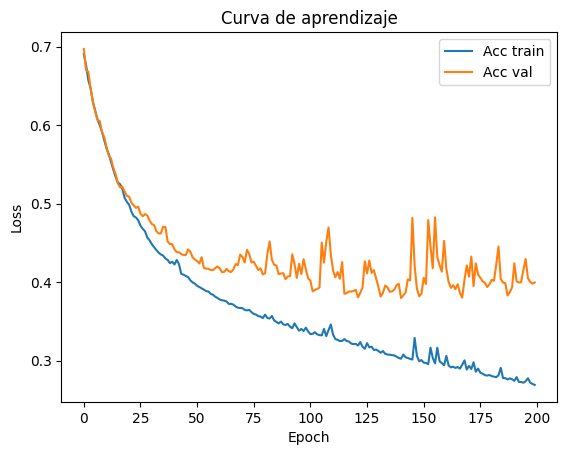

In [ ]:
# Se muestra la función de coste del modelo
plt.plot(history_heart.history['loss'], label='Acc train')
plt.plot(history_heart.history['val_loss'], label='Acc val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


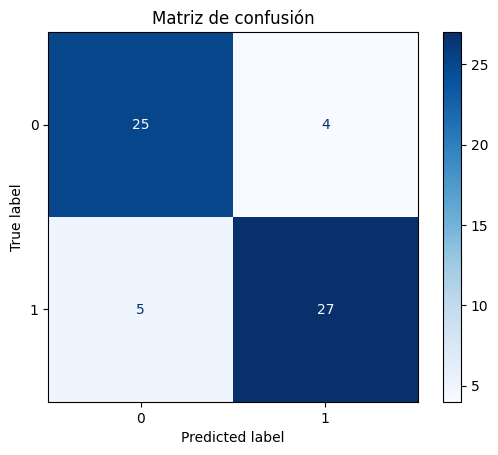

In [ ]:
# Hacer predicciones y convertir probabilidades a 0/1
# TODO

# Matriz de confusión
cm = confusion_matrix(y_test_heart, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión')
plt.show()

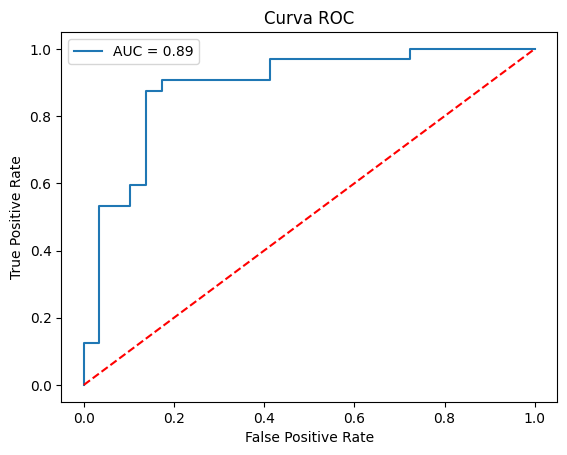

In [ ]:
# Obtenemos la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_heart, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

## 3. Clasficación multiclase con Keras
Vamos a crear una red neuronal para identificar dígitos escritos a mano usando el clásico dataset MNIST. Aprenderemos a preparar datos no estructurados como imágenes además de construir un modelo de clasificación multiclase y evaluar los resultados con visualizaciones.

### Lectura de datos
En este caso veremos el proceso completo a diferencia de los apartados anteriores (desde la lectura), para de esta manera entender paso a paso este tipo de datos. Al igual que Sklearn, TensorFlow tiene a disposición un módulo del que poder descargar datasets de ejemplo como el de MNIST, para ello utilizamos la siguiente función `mnist.load_dataset()`, que se puede importar de la siguiente forma mediante su módulo:

```python
from tensorflow.keras.datasets import mnist
```

In [4]:
# Cargamos el dataset MNIST
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

# Visualizamos las dimensiones de los datos
print(f"Dimensiones de X_train_mnist: {X_train_mnist.shape}, Dimensiones de y_train_mnist: {X_test_mnist.shape}")
print(f"Dimensiones de X_test_mnist: {X_train_mnist.shape}, Dimensiones de y_test_mnist: {y_test_mnist.shape}")

Dimensiones de X_train_mnist: (60000, 28, 28), Dimensiones de y_train_mnist: (10000, 28, 28)
Dimensiones de X_test_mnist: (60000, 28, 28), Dimensiones de y_test_mnist: (10000,)


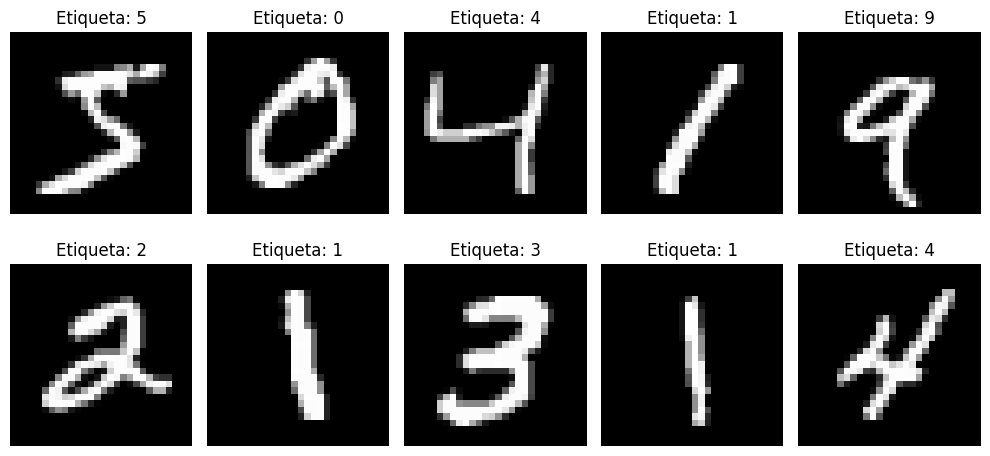

In [5]:
# Visualizamos algunas imágenes del dataset MNIST
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_mnist[i], cmap='gray')
    ax.set_title(f"Etiqueta: {y_train_mnist[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### Preprocesado de datos
En el caso de las imágenes es necesario hacer algunos pasos diferentes al de los datos tabulares:
+ Normalizar las imágenes, lo que significa dividir cada una de ellas entre 255. Cada valor se encuentra en el intervalo [0, 255], por tanto esta división convertirá cada valor en uno nuevo comprendido entre [0, 1].
+ Convertir cada imagen, que tiene un tamaño de 28x28 en un vector de 784 elementos.
+ Utilizaremos una función para transformar a categoría la etiqueta de cada imagen. En este caso utilizaremos la función específica de TensorFlow llamada `to_categorical`, se puede importar utilizando `from tensorflow.keras.utils import to_categorical`.

In [7]:
# Visualizamos una imagen específica del dataset MNIST


In [8]:
# Normalizamos los datos dividiendo por 255 para que estén en el rango [0, 1]
X_train_mnist_norm = X_train_mnist.astype("float32") / 255.0
X_test_mnist_norm = X_test_mnist.astype("float32") / 255.0

In [9]:
# Convertimos cada imagen, que tiene un tamaño de 28x28 en un vector de 784 elementos.
# Esto es necesario porque las redes neuronales esperan entradas en forma de vectores.
# Cambiamos la forma de la matriz de los datos de entrada para que cada imagen sea un vector de 784 elementos
new_size = 28*28
X_train_flat = X_train_mnist_norm.reshape(-1, new_size)
X_test_flat = X_test_mnist_norm.reshape(-1, new_size)

In [10]:
# Visualizamos las dimensiones de los datos preprocesados
print(f"Dimensiones de X_train_flat: {X_train_flat.shape}, Dimensiones de X_test_flat: {X_test_flat.shape}")

Dimensiones de X_train_flat: (60000, 784), Dimensiones de X_test_flat: (10000, 784)


In [20]:
# Convertimos las etiquetas a formato one-hot ya que las salidas en una clasificación multiclase deben estar en este formato
# Esto se utilizará en caso de que utilicemos una función de coste categorical_crossentropy
mnist_numero_clases = 10
y_train_mnist_cat = to_categorical(y_train_mnist, mnist_numero_clases)
y_test_mnist_cat = to_categorical(y_test_mnist, mnist_numero_clases)

### Creación del modelo
Puntos a tener en cuenta:
+ La última capa de la red debe contener tantas neuronas como clases tenga el dataset.
+ Además la función de activación debe ser softmax.
+ La función de coste debe ser `categorical_crossentropy`.

In [21]:
# Definimos la arquitectura del modelo
modelo_mnist = models.Sequential([
    layers.Input(shape=(new_size,), name='Capa_de_entrada'),
    layers.Dense(128, activation='relu', name='Capa_oculta_1'),
    layers.Dense(64, activation='relu', name='Capa_oculta_2'),
    layers.Dense(mnist_numero_clases, activation='softmax', name='Capa_de_salida')
])

# Compilamos el modelo
modelo_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Mostramos un resumen del modelo
modelo_mnist.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_oculta_1 (Dense)           │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_oculta_2 (Dense)           │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_de_salida (Dense)          │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
%%time
# Entrenamos el modelo y guardamos el historial para visualizar el aprendizaje
history_mnist = modelo_mnist.fit(X_train_flat, y_train_mnist, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9968 - loss: 0.0099 - val_accuracy: 0.9765 - val_loss: 0.1439
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 0.9735 - val_loss: 0.1705
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9974 - loss: 0.0088 - val_accuracy: 0.9756 - val_loss: 0.1553
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9714 - val_loss: 0.1862
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9970 - loss: 0.0088 - val_accuracy: 0.9753 - val_loss: 0.1757
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9973 - loss: 0.0082 - val_accuracy: 0.9757 - val_loss: 0.1660
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9978 - loss: 0.0076 - val_accuracy: 0.9727 - val_loss: 0.2059
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9974 - loss: 0.0108 - 

### Evaluación del modelo

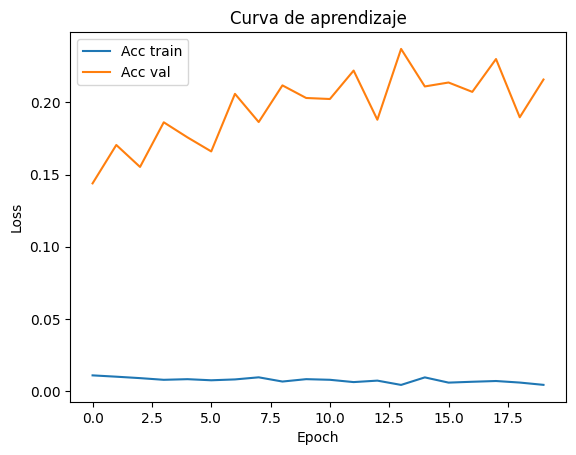

In [25]:
# Visualizamos la función de coste del modelo
plt.plot(history_mnist.history['loss'], label='Acc train')
plt.plot(history_mnist.history['val_loss'], label='Acc val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()

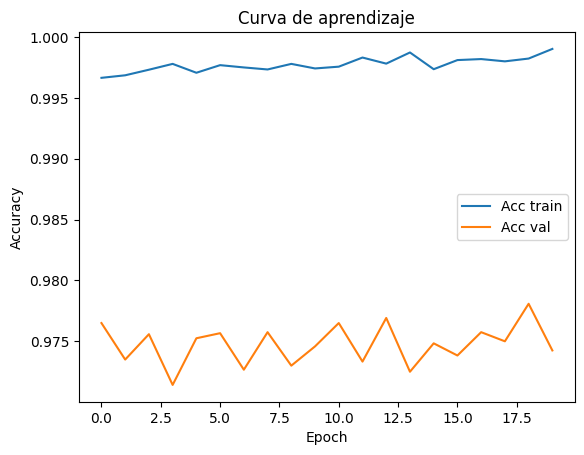

In [26]:
# Visualizamos la evolución del accuracy del modelo
plt.plot(history_mnist.history['accuracy'], label='Acc train')
plt.plot(history_mnist.history['val_accuracy'], label='Acc val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()

In [27]:
# Evaluamos el modelo en el conjunto de prueba
loss, acc = modelo_mnist.evaluate(X_test_flat, y_test_mnist)
print("Accuracy en test:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9712 - loss: 0.2590
Accuracy en test: 0.9750000238418579


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


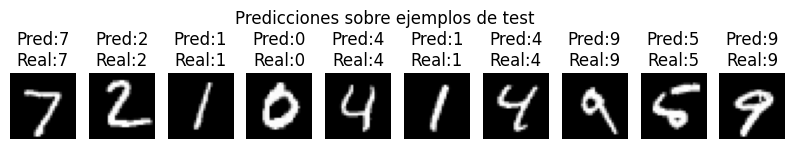

In [32]:
# Predecir las primeras 10 imágenes del test
y_pred_prob = modelo_mnist.predict(X_test_flat)
y_pred_clases = np.argmax(y_pred_prob, axis=1)

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test_mnist[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Pred:{y_pred_clases[i]}\nReal:{y_test_mnist[i]}")
plt.suptitle('Predicciones sobre ejemplos de test')
plt.show()


<Figure size 800x800 with 0 Axes>

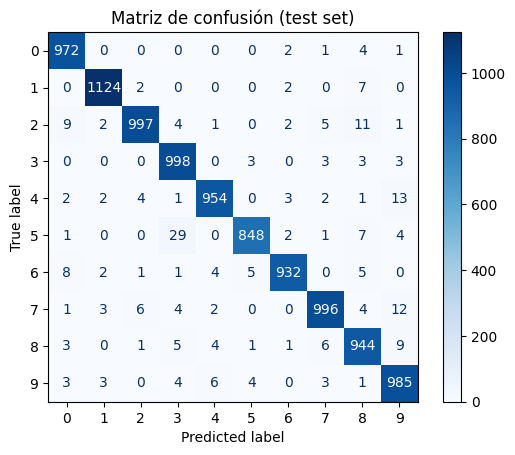

In [34]:
cm = confusion_matrix(y_test_mnist, y_pred_clases)
plt.figure(figsize=(8, 8))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', values_format='d')
plt.title('Matriz de confusión (test set)')
plt.show()


## 4. Regularización
Cuando una red neuronal es muy compleja (muchas capas o neuronas) puede aprenderse de memoria los datos de entrenamiento (overfitting), pero falla al generalizar en nuevos datos.

### Ejemplo base
Tomamos la red neuronal que hemos utilizado para llevar a cabo el apartado de regresión de Boston:

```python
# Definimos una red sencilla: dos capas ocultas, función de activación ReLU
# Para ello utilizamos Sequential
modelo_boston = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_boston_scaled.shape[1],)),  # Capa oculta con 64 neuronas
    layers.Dense(32, activation='relu'),                                   # Segunda capa oculta con 32 neuronas
    layers.Dense(1)                                                        # Capa de salida para regresión
])

# Compilar el modelo
modelo_boston.compile(optimizer='adam', loss='mse', metrics=['mae'])
# optimizer='adam': método moderno y eficiente para ajustar los pesos
# loss='mse': error cuadrático medio, típico en regresión
# metrics=['mae']: error absoluto medio, fácil de interpretar

# Mostramos un resumen del modelo
modelo_boston.summary()
```

In [42]:
# Definimos una red sencilla: dos capas ocultas, función de activación ReLU
# Para ello utilizamos Sequential
modelo_boston = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_boston_scaled.shape[1],)),  # Capa oculta con 64 neuronas
    layers.Dense(32, activation='relu'),                                   # Segunda capa oculta con 32 neuronas
    layers.Dense(1)                                                        # Capa de salida para regresión
])

# Compilar el modelo
modelo_boston.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mse', metrics=['mae'])
# optimizer='adam': método moderno y eficiente para ajustar los pesos
# loss='mse': error cuadrático medio, típico en regresión
# metrics=['mae']: error absoluto medio, fácil de interpretar

# Mostramos un resumen del modelo
modelo_boston.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Entrenar el modelo y guardar el historial para visualizar el aprendizaje
history_base = modelo_boston.fit(X_train_boston_scaled, y_train_boston, epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 588.4451 - mae: 21.8914 - val_loss: 154.0630 - val_mae: 10.3129
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 136.3479 - mae: 9.3672 - val_loss: 35.3441 - val_mae: 4.2384
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.8149 - mae: 4.2787 - val_loss: 35.5803 - val_mae: 4.5237
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.1543 - mae: 4.2805 - val_loss: 25.3088 - val_mae: 3.6614
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.2903 - mae: 3.0468 - val_loss: 21.0220 - val_mae: 3.2090
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.0683 - mae: 3.1163 - val_loss: 20.6243 - val_mae: 3.2492
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.1193 - mae: 2.8757 - val_loss: 18.6961 - val_mae: 3.2090
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.5826 - mae: 2.9462 - val_loss: 18.5037 - val_mae: 3.1088
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0

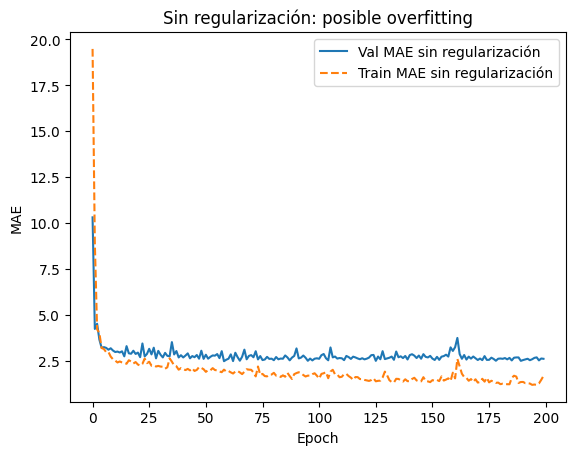

In [44]:
# Mostramos las curvas del MAE
plt.plot(history_base.history['val_mae'], label='Val MAE sin regularización')
plt.plot(history_base.history['mae'], '--', label='Train MAE sin regularización')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Sin regularización: posible overfitting')
plt.legend()
plt.show()

### Dropout
De manera aleatoria son capas que lo que hacen será apagar un % de neuronas definido, de esta manera se obliga a que dichas neuronas no aprendan y pueda mejorar la generalización.

In [46]:
# Definimos una red sencilla: dos capas ocultas, función de activación ReLU
# Para ello utilizamos Sequential e incluiremos una capa de dropout con el % que consideremos tras cada capa oculta
modelo_boston_dropout = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_boston_scaled.shape[1],)),  # Capa oculta con 64 neuronas
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),  # Segunda capa oculta con 32 neuronas
    layers.Dropout(0.2),
    layers.Dense(1)                                                        # Capa de salida para regresión
])
# Compilar el modelo
modelo_boston_dropout.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mse', metrics=['mae'])
# Mostramos un resumen del modelo
modelo_boston_dropout.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
%%time
# Entrenar el modelo y guardar el historial para visualizar el aprendizaje
history_dropout = modelo_boston_dropout.fit(X_train_boston_scaled, y_train_boston, epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - loss: 470.1661 - mae: 19.6494 - val_loss: 66.9544 - val_mae: 6.2229
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 102.9406 - mae: 7.8692 - val_loss: 31.4416 - val_mae: 4.2777
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 45.5476 - mae: 5.2526 - val_loss: 33.0786 - val_mae: 4.0266
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39.6970 - mae: 4.6057 - val_loss: 25.2823 - val_mae: 3.2195
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.4624 - mae: 4.3001 - val_loss: 21.1726 - val_mae: 3.0161
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27.0229 - mae: 4.0115 - val_loss: 24.6811 - val_mae: 3.4446
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.3287 - mae: 4.0976 - val_loss: 17.9743 - val_mae: 2.8693
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 33.5046 - mae: 4.4361 - val_loss: 20.2945 - val_mae: 3.0462
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 

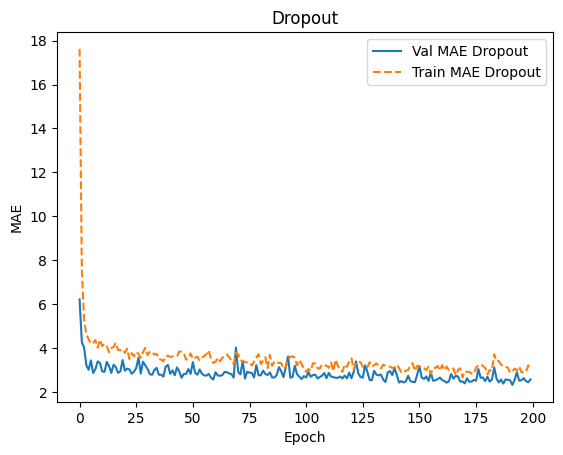

In [48]:
# Visualizamos la función de coste del modelo con Dropout
plt.plot(history_dropout.history['val_mae'], label='Val MAE Dropout')
plt.plot(history_dropout.history['mae'], '--', label='Train MAE Dropout')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Dropout')
plt.legend()
plt.show()

### Early Stopping
Vigila la función de coste y en el momento en el que el modelo deja de mejorar finaliza automáticamente el proceso de entrenamiento. Además de evitar el sobreajuste reduce el tiempo de entrenado.

Para este caso se necesitará utilizar el callback `EarlyStopping`:
```python
from tensorflow.keras.callbacks import EarlyStopping
```

In [ ]:
# Definimos una red sencilla: dos capas ocultas, función de activación ReLU
# Para ello utilizamos Sequential

# Compilar el modelo

# Mostramos un resumen del modelo
modelo_boston_early.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Definimos un callback de EarlyStopping para detener el entrenamiento si no hay mejora en la validación


In [ ]:
%%time
# Entrenar el modelo y guardar el historial para visualizar el aprendizajehistory_early = modelo_boston_early.fit(X_train_boston_scaled, y_train_boston, epochs=200, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 553.5601 - mae: 21.3227 - val_loss: 152.5220 - val_mae: 10.2394
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 134.8680 - mae: 9.4572 - val_loss: 37.7109 - val_mae: 4.6869
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 30.3918 - mae: 4.1018 - val_loss: 39.3360 - val_mae: 4.7839
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 27.2147 - mae: 3.8901 - val_loss: 28.4588 - val_mae: 3.9055
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 21.1955 - mae: 3.4793 - val_loss: 19.7619 - val_mae: 3.2893
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 17.3512 - mae: 3.1266 - val_loss: 21.8900 - val_mae: 3.4930
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.7038 - mae: 2.8346 - val_loss: 18.7101 - val_mae: 3.1519
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.2348 - mae: 2.5508 - val_loss: 18.2907 - val_mae: 3.0493
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━

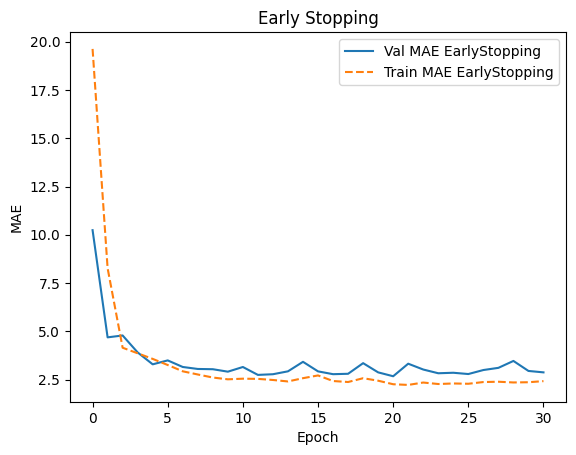

Entrenamiento detenido en epoch: 31


In [ ]:
# Visualizamos la función de coste del modelo con Early Stopping
plt.plot(history_early.history['val_mae'], label='Val MAE EarlyStopping')
plt.plot(history_early.history['mae'], '--', label='Train MAE EarlyStopping')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Early Stopping')
plt.legend()
plt.show()

print(f"Entrenamiento detenido en epoch: {len(history_early.history['mae'])}")

In [ ]:
# Evaluar todos los modelos en test
print("MAE sin regularización:", modelo_boston.evaluate(X_test_boston_scaled, y_test_boston, verbose=0)[1])
print("MAE con Dropout:", modelo_boston_dropout.evaluate(X_test_boston_scaled, y_test_boston, verbose=0)[1])
print("MAE con Early Stopping:", modelo_boston_early.evaluate(X_test_boston_scaled, y_test_boston, verbose=0)[1])

MAE sin regularización: 2.4213523864746094
MAE con Dropout: 2.3851120471954346
MAE con Early Stopping: 2.5157978534698486


## 99. Ejercicios


### 1. Regresión

#### 1.1 Modifica el número de capas y neuronas
Cambiando el número de capas definidas en el modelo inicial de boston, comprueba cómo varia el error y tiempo de entrenamiento

#### 1.2 Eliminar la estandarización
Previo a realizar un entrenamiento de la red neuronal de regresión, prueba a eliminar la estandarización y ver cómo afecta al performance del modelo y al tiempo de entrenamiento. Utiliza una normalización para ver la diferencia.

### 2. Clasificación Binaria

#### 2.1 Cambia el umbral de la clasificación
Se ha creado una clasificación en la que se ha asignado 0.5 como límite para determinar si la persona tendrá una enfermedad de corazón o no. Prueba a ver cómo quedan las métricas así como la curva ROC y el AUC modificando este valor.

#### 2.2 Utiliza otra arquitectura para la red neuronal
Cambia tanto el número de neuronas como de capas para optimizar la red

#### 2.3 Utiliza otra métrica para optimizar la red neuronal
En vez de utilizar el `accuracy` como métrica utiliza otra, también prueba a cambiar el optimizador de `SGD` por `Adam` e incluso cambia el `learning_rate`.

### 3. Clasificación Multiclase

#### 3.1 Cambia la arquitectura de la red
Para ver cómo responde el clasificador multiclase, prueba a:
+ Cambiar el número de capas
+ Cambiar el número de neuronas

### 4. Regularización

#### 4.1 Prueba Dropout y Early Stopping para un clasificador binario
Repite la misma comparativa utilizando capas de Dropout y Early Stopping sobre una red neuronal sobre el dataset de heart desease.

#### 4.2 Combina capas de Dropout y Early Stopping
Conociendo cómo funcionan individualmente, prueba a crear una red neuronal utilizando ambas técnicas para que puedas observar el resultado que obtienes con un clasificador binario, en vez de una regresión